In [1]:
import warnings
warnings.filterwarnings('ignore')

### 테스트 데이터 중 랜덤으로 하나를 선택하여 해당 날짜에 대한 예측을 진행합니다

In [2]:
from solar_power.environment_prediction_model import SolarPredictionModelExtended 
from solar_power.solar_prediction_model import FeatureSolarPredictionModel
from electrical_load.load_prediction_model import BuildingEnergyModel

# * 모델 선언
# * 랜덤 시드 값을 모델 간 동일하게 42로 설정
# * 테스트 데이터 개수는 모델 간 동일하게 12 설정, 12/62 = 19.35%

random_state = 42
test_size = 12 

# * 기상 데이터 to 환경 감시 데이터 예측 모델
env_pred_model = SolarPredictionModelExtended("./solar_power/merged_result.csv", random_state=random_state, test_size=test_size)
env_pred_model.load_data()
env_pred_model.hyperparameter_tuning()
env_pred_model.train_model()

# * 환경 감시 데이터 to 태양광 발전량 예측 모델
solar_pred_model = FeatureSolarPredictionModel("./solar_power/merged_result.csv", random_state=random_state, test_size=test_size)
solar_pred_model.load_data()
solar_pred_model.feature_selection()
solar_pred_model.train_model()

# * 건물 전기 부하 예측 모델
energy_pred_model = BuildingEnergyModel("./electrical_load/merged_data.csv", random_state=random_state, test_size=test_size)
energy_pred_model.load_data()
energy_pred_model.train_model()

In [3]:

# * 태양광 발전량 예측 모델에 입력할 정규화된 입력 데이터
# * test_x 는 1시간 단위의 데이터
# * test_date 는 예측할 시간의 날짜

import numpy as np
rand_int = np.random.randint(0, len(env_pred_model.X_test))

test_x = env_pred_model.X_test.iloc[rand_int:rand_int+1, :]
test_index = test_x.index[0]
test_date = env_pred_model.data.loc[test_index, 'day']

test_x

,강수확률,일최저기온,하늘상태,일최고기온,습도,풍향,풍속,time
2,0.0,0.8,0.0,0.714286,0.916667,0.779596,0.354839,0.543478


In [4]:

# * 1시간 단위의 데이터와 같은 날짜의 데이터 24개를 합쳐 same_day_X_test 생성

same_day_data = env_pred_model.data[env_pred_model.data['day'] == test_date]
same_day_data_indexes = same_day_data.index
same_day_X_test = env_pred_model.X_test.loc[env_pred_model.X_test.index.isin(same_day_data_indexes)]

same_day_X_test

,강수확률,일최저기온,하늘상태,일최고기온,습도,풍향,풍속,time
0,0.0,0.8,0.000000,0.714286,0.833333,0.840999,0.322581,0.500000
1,0.0,0.8,0.000000,0.714286,0.916667,0.814660,0.290323,0.521739
2,0.0,0.8,0.000000,0.714286,0.916667,0.779596,0.354839,0.543478
3,0.0,0.8,0.000000,0.714286,0.916667,0.750000,0.370968,0.565217
4,0.0,0.8,0.000000,0.714286,0.916667,0.687303,0.370968,0.586957
5,0.0,0.8,0.000000,0.714286,0.916667,0.679184,0.338710,0.608696
6,0.0,0.8,0.000000,0.714286,0.916667,0.695366,0.354839,0.630435
7,0.2,0.8,0.666667,0.714286,0.750000,0.695366,0.403226,0.652174
8,0.3,0.8,1.000000,0.714286,0.750000,0.711309,0.483871,0.673913
9,0.3,0.8,1.000000,0.714286,0.583333,0.726995,0.516129,0.695652


# 태양광 발전량 예측

In [5]:
import pandas as pd
# * 예측한 태양광 발전량 데이터

res_solar = env_pred_model.predict(same_day_X_test) # 기상 데이터 -> 환경감시 데이터
res_solar = solar_pred_model.predict(res_solar) # 환경감시 데이터 -> 태양광 발전량 데이터
res_solar

,축구장,학생회관,중앙창고,학사과정,다산빌딩,시설관리동,대학C동,동물실험동,중앙도서관,LG도서관,신재생에너지동,삼성환경동,중앙연구기기센터,산업협력관,기숙사 B동
0,2.0,-0.2,0.4,-0.4,-0.1,0.1,0.1,0.3,0.8,0.8,-0.7,-0.2,0.0,1.0,1.4
1,2.6,-0.1,0.5,-0.4,-0.1,0.3,0.1,0.5,1.0,1.0,-0.7,-0.2,0.1,1.3,1.7
2,2.6,0.0,0.5,-0.4,-0.1,0.4,0.2,0.5,1.0,0.9,-0.5,-0.1,0.2,1.5,1.6
3,2.6,0.0,0.5,-0.4,-0.1,0.4,0.2,0.5,1.0,0.9,-0.5,-0.1,0.2,1.5,1.6
4,2.6,0.0,0.5,-0.4,-0.1,0.4,0.2,0.5,1.0,0.9,-0.5,-0.1,0.2,1.5,1.6
5,2.8,0.0,0.5,-0.4,-0.1,0.4,0.2,0.5,1.1,1.0,-0.5,-0.1,0.2,1.6,1.7
6,2.6,0.0,0.5,-0.4,-0.1,0.4,0.2,0.5,1.0,0.9,-0.5,-0.1,0.2,1.5,1.6
7,-3.3,5.6,5.3,3.4,-1.4,6.8,0.8,0.2,-0.6,-1.4,0.7,1.0,-1.6,3.9,2.3
8,10.4,11.6,9.3,7.1,3.1,21.1,2.6,4.9,3.2,3.8,9.7,9.1,13.0,16.4,7.4
9,60.0,28.5,19.8,12.2,16.4,70.3,7.7,18.3,16.3,20.9,33.2,34.0,54.0,52.7,24.7


In [6]:
# * 실제 태양광 발전량

same_day_y_test = solar_pred_model.y_test.loc[solar_pred_model.y_test.index.isin(same_day_data_indexes)]
same_day_y_test

,축구장,학생회관,중앙창고,학사과정,다산빌딩,시설관리동,대학C동,동물실험동,중앙도서관,LG도서관,신재생에너지동,삼성환경동,중앙연구기기센터,산업협력관,기숙사 B동
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.7,0.4,0.0,0.1,0.6,0.4,0.7,0.0,0.5,1.1,0.0,0.4,2.0,0.7
7,5.3,5.8,5.0,3.2,0.8,3.8,0.7,2.1,1.6,1.7,5.5,3.0,5.2,6.0,2.5
8,33.3,14.3,11.2,5.7,5.1,23.5,3.0,3.6,6.8,6.6,17.2,13.3,24.5,25.1,8.0
9,33.0,23.7,18.6,10.3,16.1,56.0,3.6,9.0,16.4,21.1,37.7,32.4,50.2,43.3,14.9


In [7]:
def korean_to_english_solar(column_name):
    mapping = {
        "축구장": "Soccer_Field",
        "학생회관": "Student_Hall",
        "중앙창고": "Central_Warehouse",
        "학사과정": "Academic_Courses",
        "다산빌딩": "Dasan_Building",
        "시설관리동": "Facility_Management",
        "대학C동": "University_C",
        "동물실험동": "Animal_Experiment",
        "중앙도서관": "Central_Library",
        "LG도서관": "LG_Library",
        "신재생에너지동": "Renewable_Energy",
        "삼성환경동": "Samsung_Environment",
        "중앙연구기기센터": "Research_Equipment_Center",
        "산업협력관": "Industrial_Collaboration",
        "기숙사 B동": "Dormitory_B"
    }
    return mapping.get(column_name, "Unknown_Column")

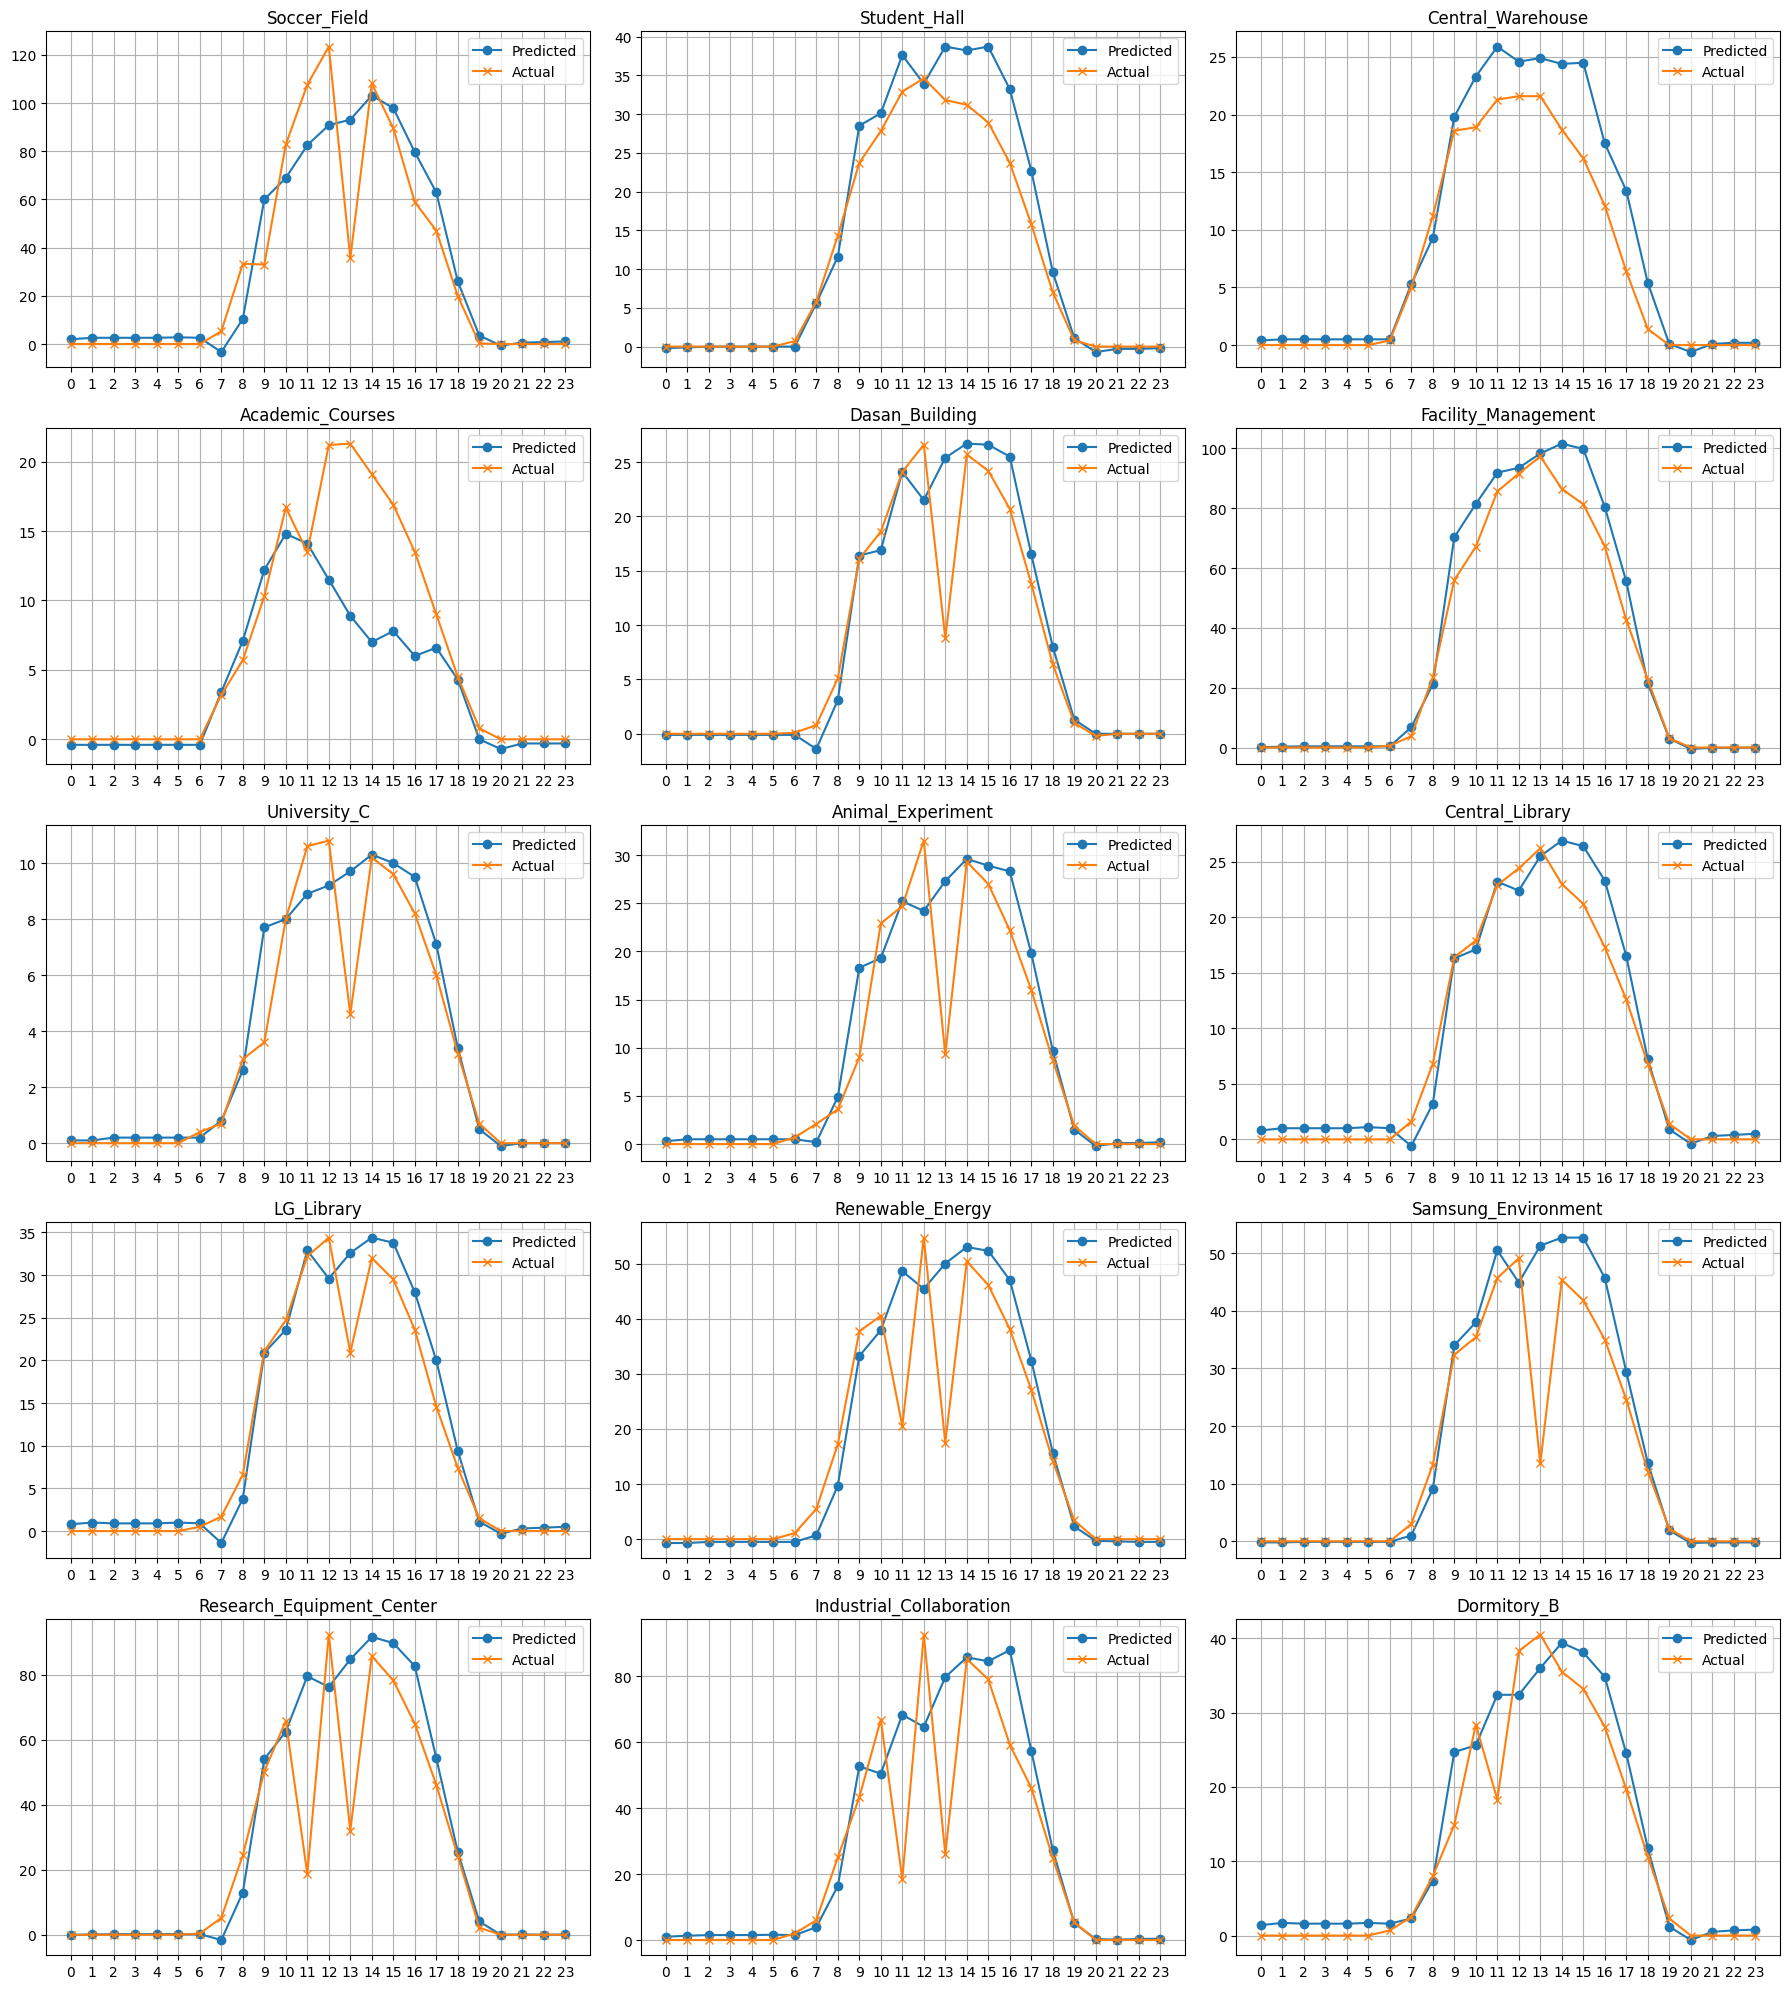

In [8]:
import matplotlib.pyplot as plt

hours = list(range(24))

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 20))
for ax, column in zip(axes.flatten(), res_solar.columns):
    ax.plot(hours, res_solar[column], label='Predicted', marker='o')
    ax.plot(hours, same_day_y_test[column], label='Actual', marker='x')  # Using the dummy data as 'Actual' for demonstration
    ax.set_title(korean_to_english_solar(column))
    ax.legend()
    ax.grid(True)
    ax.set_xticks(hours)
    
plt.tight_layout()
plt.show()


## 오차율의 공식:

Mean Absolute Percentage Error (MAPE)

$$
MAPE = \frac{1}{n} \sum \left( \frac{|A_t - F_t|}{A_t} \right) \times 100
$$

In [9]:
def calculate_mape(df1, df2, epsilon=0.0001):
    assert df1.shape == df2.shape, "DataFrames must have the same shape."
    total_sum_df1 = df1.sum().sum()
    total_sum_df2 = df2.sum().sum()
    percentage_error_total_sums = abs(total_sum_df1 - total_sum_df2) / total_sum_df1 * 100
    return percentage_error_total_sums

mape_value = round(calculate_mape(res_solar, same_day_y_test), 1)
print(f"오차율은 {mape_value}% 입니다")

오차율은 11.8% 입니다


# 전기 부하량 예측

In [10]:
# * 부하량 예측 모델에 입력할 정규화된 입력 데이터

same_day_X_test = energy_pred_model.X_test.loc[energy_pred_model.X_test.index.isin(same_day_data_indexes)]
same_day_X_test

,time,1시간기온,1시간강수량,일최고기온,일최저기온,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0,25.0,0.0,32.0,24.0,True,False,False,False,False,False,False
1,1,25.0,0.0,32.0,24.0,True,False,False,False,False,False,False
2,2,24.0,0.0,32.0,24.0,True,False,False,False,False,False,False
3,3,24.0,0.0,32.0,24.0,True,False,False,False,False,False,False
4,4,24.0,0.0,32.0,24.0,True,False,False,False,False,False,False
5,5,24.0,0.0,32.0,24.0,True,False,False,False,False,False,False
6,6,24.0,0.0,32.0,24.0,True,False,False,False,False,False,False
7,7,25.0,0.0,32.0,24.0,True,False,False,False,False,False,False
8,8,27.0,0.0,32.0,24.0,True,False,False,False,False,False,False
9,9,28.0,0.0,32.0,24.0,True,False,False,False,False,False,False


In [11]:
# * 예측한 전기 부하량

res_load = energy_pred_model.predict(same_day_X_test)
res_load

,중앙P/P_석사,전기전자컴퓨터공학동_석사,신소재공학_석사,생명과학동_석사,기계공학동_석사,LG도서관_석사,창업B동_석사,금호관_석사,"냉각수순환펌프1,2,3_석사","냉각수순환펌프4,5,6_석사",...,대학B동(E)_학사,대학기숙사A동(E)_학사,학사P/P(E)_학사,제2학생회관(E)_학사,교원아파트(E)_학사,대학C동(E)_학사,중앙연구기기센터(E)_학사,대학A동(E)_학사,다산빌딩(E)_학사,산학협력연구동(E)_학사
0,155.1,426.9,415.0,463.5,115.4,249.7,28.1,51.2,0.0,0.0,...,30.7,38.8,41.4,26.4,24.9,19.8,49.7,18.6,53.8,18.4
1,158.4,426.6,413.2,451.1,110.9,237.1,30.5,51.0,0.0,0.0,...,29.4,36.8,43.3,24.4,24.0,19.7,48.1,16.0,49.2,18.3
2,136.2,421.5,407.8,426.0,107.8,210.6,28.5,50.9,0.0,0.0,...,27.4,33.2,53.1,27.8,21.0,16.7,47.2,15.8,43.9,18.3
3,135.6,418.5,405.9,439.3,106.8,207.9,30.1,51.1,0.0,0.0,...,28.7,32.7,42.9,24.2,20.6,16.1,46.8,19.0,38.4,18.0
4,138.7,416.3,402.0,439.4,104.6,212.4,28.9,50.6,0.0,0.0,...,26.6,29.9,39.8,22.7,19.5,16.2,47.3,16.7,38.3,18.1
5,121.8,417.5,394.6,438.9,107.5,225.0,41.0,52.1,0.0,0.0,...,29.6,25.4,31.2,28.0,23.2,16.8,48.0,16.4,43.4,18.3
6,110.0,416.9,397.8,470.9,107.3,239.5,34.9,51.7,0.0,0.0,...,33.6,25.0,24.2,30.8,27.3,17.0,49.5,18.8,43.6,20.8
7,111.4,435.5,409.4,484.8,121.9,268.2,34.4,54.1,146.7,101.7,...,35.9,30.2,28.0,31.6,32.0,25.2,52.5,19.0,46.8,21.4
8,172.1,462.7,470.8,601.7,221.8,326.9,41.9,69.5,231.2,139.8,...,52.3,37.8,36.3,45.0,40.5,36.9,62.7,30.8,68.1,27.1
9,145.6,511.4,517.2,639.1,238.9,342.0,49.8,70.7,206.0,122.8,...,55.8,38.8,30.1,45.7,36.4,34.5,67.6,30.4,84.2,25.3


In [12]:
# * 실제 전기 부하량

same_day_y_test = energy_pred_model.y_test.loc[energy_pred_model.y_test.index.isin(same_day_data_indexes)]
same_day_y_test

,중앙P/P_석사,전기전자컴퓨터공학동_석사,신소재공학_석사,생명과학동_석사,기계공학동_석사,LG도서관_석사,창업B동_석사,금호관_석사,"냉각수순환펌프1,2,3_석사","냉각수순환펌프4,5,6_석사",...,대학B동(E)_학사,대학기숙사A동(E)_학사,학사P/P(E)_학사,제2학생회관(E)_학사,교원아파트(E)_학사,대학C동(E)_학사,중앙연구기기센터(E)_학사,대학A동(E)_학사,다산빌딩(E)_학사,산학협력연구동(E)_학사
0,147.8,419.0,408.8,497.6,129.3,262.2,19.3,49.7,0.0,0.0,...,37.7,43.8,55.9,23.9,27.0,14.9,47.4,14.7,54.2,18.1
1,147.8,424.5,397.2,442.3,123.5,245.5,19.8,49.5,0.0,0.0,...,27.3,53.6,43.4,26.6,30.3,14.7,46.0,14.6,45.7,18.0
2,135.9,409.9,388.8,445.9,121.5,271.0,19.3,48.5,0.0,0.0,...,25.7,39.8,42.4,33.6,30.3,15.1,45.2,14.3,43.0,18.0
3,142.2,403.0,380.6,506.2,112.3,231.5,19.9,49.2,0.0,0.0,...,25.7,40.4,62.5,37.0,21.2,15.0,44.8,15.0,35.6,19.6
4,146.8,407.8,388.0,431.9,113.9,230.2,19.8,48.9,0.0,0.0,...,24.2,27.4,37.9,22.4,24.8,28.8,46.0,13.0,33.8,18.1
5,114.0,406.0,391.3,422.7,113.0,234.4,21.9,49.0,0.0,0.0,...,25.2,24.4,29.3,27.9,25.3,9.4,48.9,14.3,33.1,18.1
6,111.4,416.3,394.4,473.1,121.4,271.4,21.4,53.3,0.0,0.0,...,36.2,21.6,26.7,33.9,26.3,13.7,48.9,17.8,43.2,19.9
7,117.3,436.9,407.5,502.7,143.0,265.2,25.6,56.6,0.0,0.0,...,29.8,21.4,24.1,33.2,33.2,30.1,46.6,19.3,44.3,25.3
8,129.0,476.5,456.7,544.3,232.0,309.6,52.4,71.3,226.5,110.5,...,44.7,36.6,28.6,37.4,43.5,30.1,64.4,30.6,61.6,29.9
9,125.2,508.3,510.9,665.3,245.0,350.1,48.7,72.7,205.3,104.0,...,50.9,48.7,40.7,38.8,35.9,32.0,63.4,31.1,69.6,23.5


In [13]:
def korean_to_english_load(column_name):
    mapping = {
        "축구장": "Soccer_Field",
        "학생회관": "Student_Hall",
        "중앙창고": "Central_Warehouse",
        "학사과정": "Academic_Courses",
        "다산빌딩": "Dasan_Building",
        "시설관리동": "Facility_Management",
        "대학C동": "University_C",
        "동물실험동": "Animal_Experiment",
        "중앙도서관": "Central_Library",
        "LG도서관": "LG_Library",
        "신재생에너지동": "Renewable_Energy",
        "삼성환경동": "Samsung_Environment",
        "중앙연구기기센터": "Research_Equipment_Center",
        "산업협력관": "Industrial_Collaboration",
        "기숙사 B동": "Dormitory_B",
        "중앙P/P_석사": "Central_PP_Masters",
        "전기전자컴퓨터공학동_석사": "EECS_Masters",
        "신소재공학_석사": "NewMaterialEng_Masters",
        "생명과학동_석사": "LifeScience_Masters",
        "기계공학동_석사": "MechanicalEng_Masters",
        "LG도서관_석사": "LG_Library_Masters",
        "창업B동_석사": "StartupB_Masters",
        "금호관_석사": "Geumho_Masters",
        "냉각수순환펌프1,2,3_석사": "CoolingPump123_Masters",
        "냉각수순환펌프4,5,6_석사": "CoolingPump456_Masters",
        "대학B동(E)_학사": "UniversityB_E_Bachelors",
        "대학기숙사A동(E)_학사": "DormitoryA_E_Bachelors",
        "학사P/P(E)_학사": "AcademicPP_E_Bachelors",
        "제2학생회관(E)_학사": "StudentHall2_E_Bachelors",
        "교원아파트(E)_학사": "TeacherApartment_E_Bachelors",
        "대학C동(E)_학사": "UniversityC_E_Bachelors",
        "중앙연구기기센터(E)_학사": "ResearchEquipmentCenter_E_Bachelors",
        "대학A동(E)_학사": "UniversityA_E_Bachelors",
        "다산빌딩(E)_학사": "DasanBuilding_E_Bachelors",
        "산학협력연구동(E)_학사": "IndustrialCollaborationResearch_E_Bachelors"
    }
    return mapping.get(column_name, "Unknown_Column")

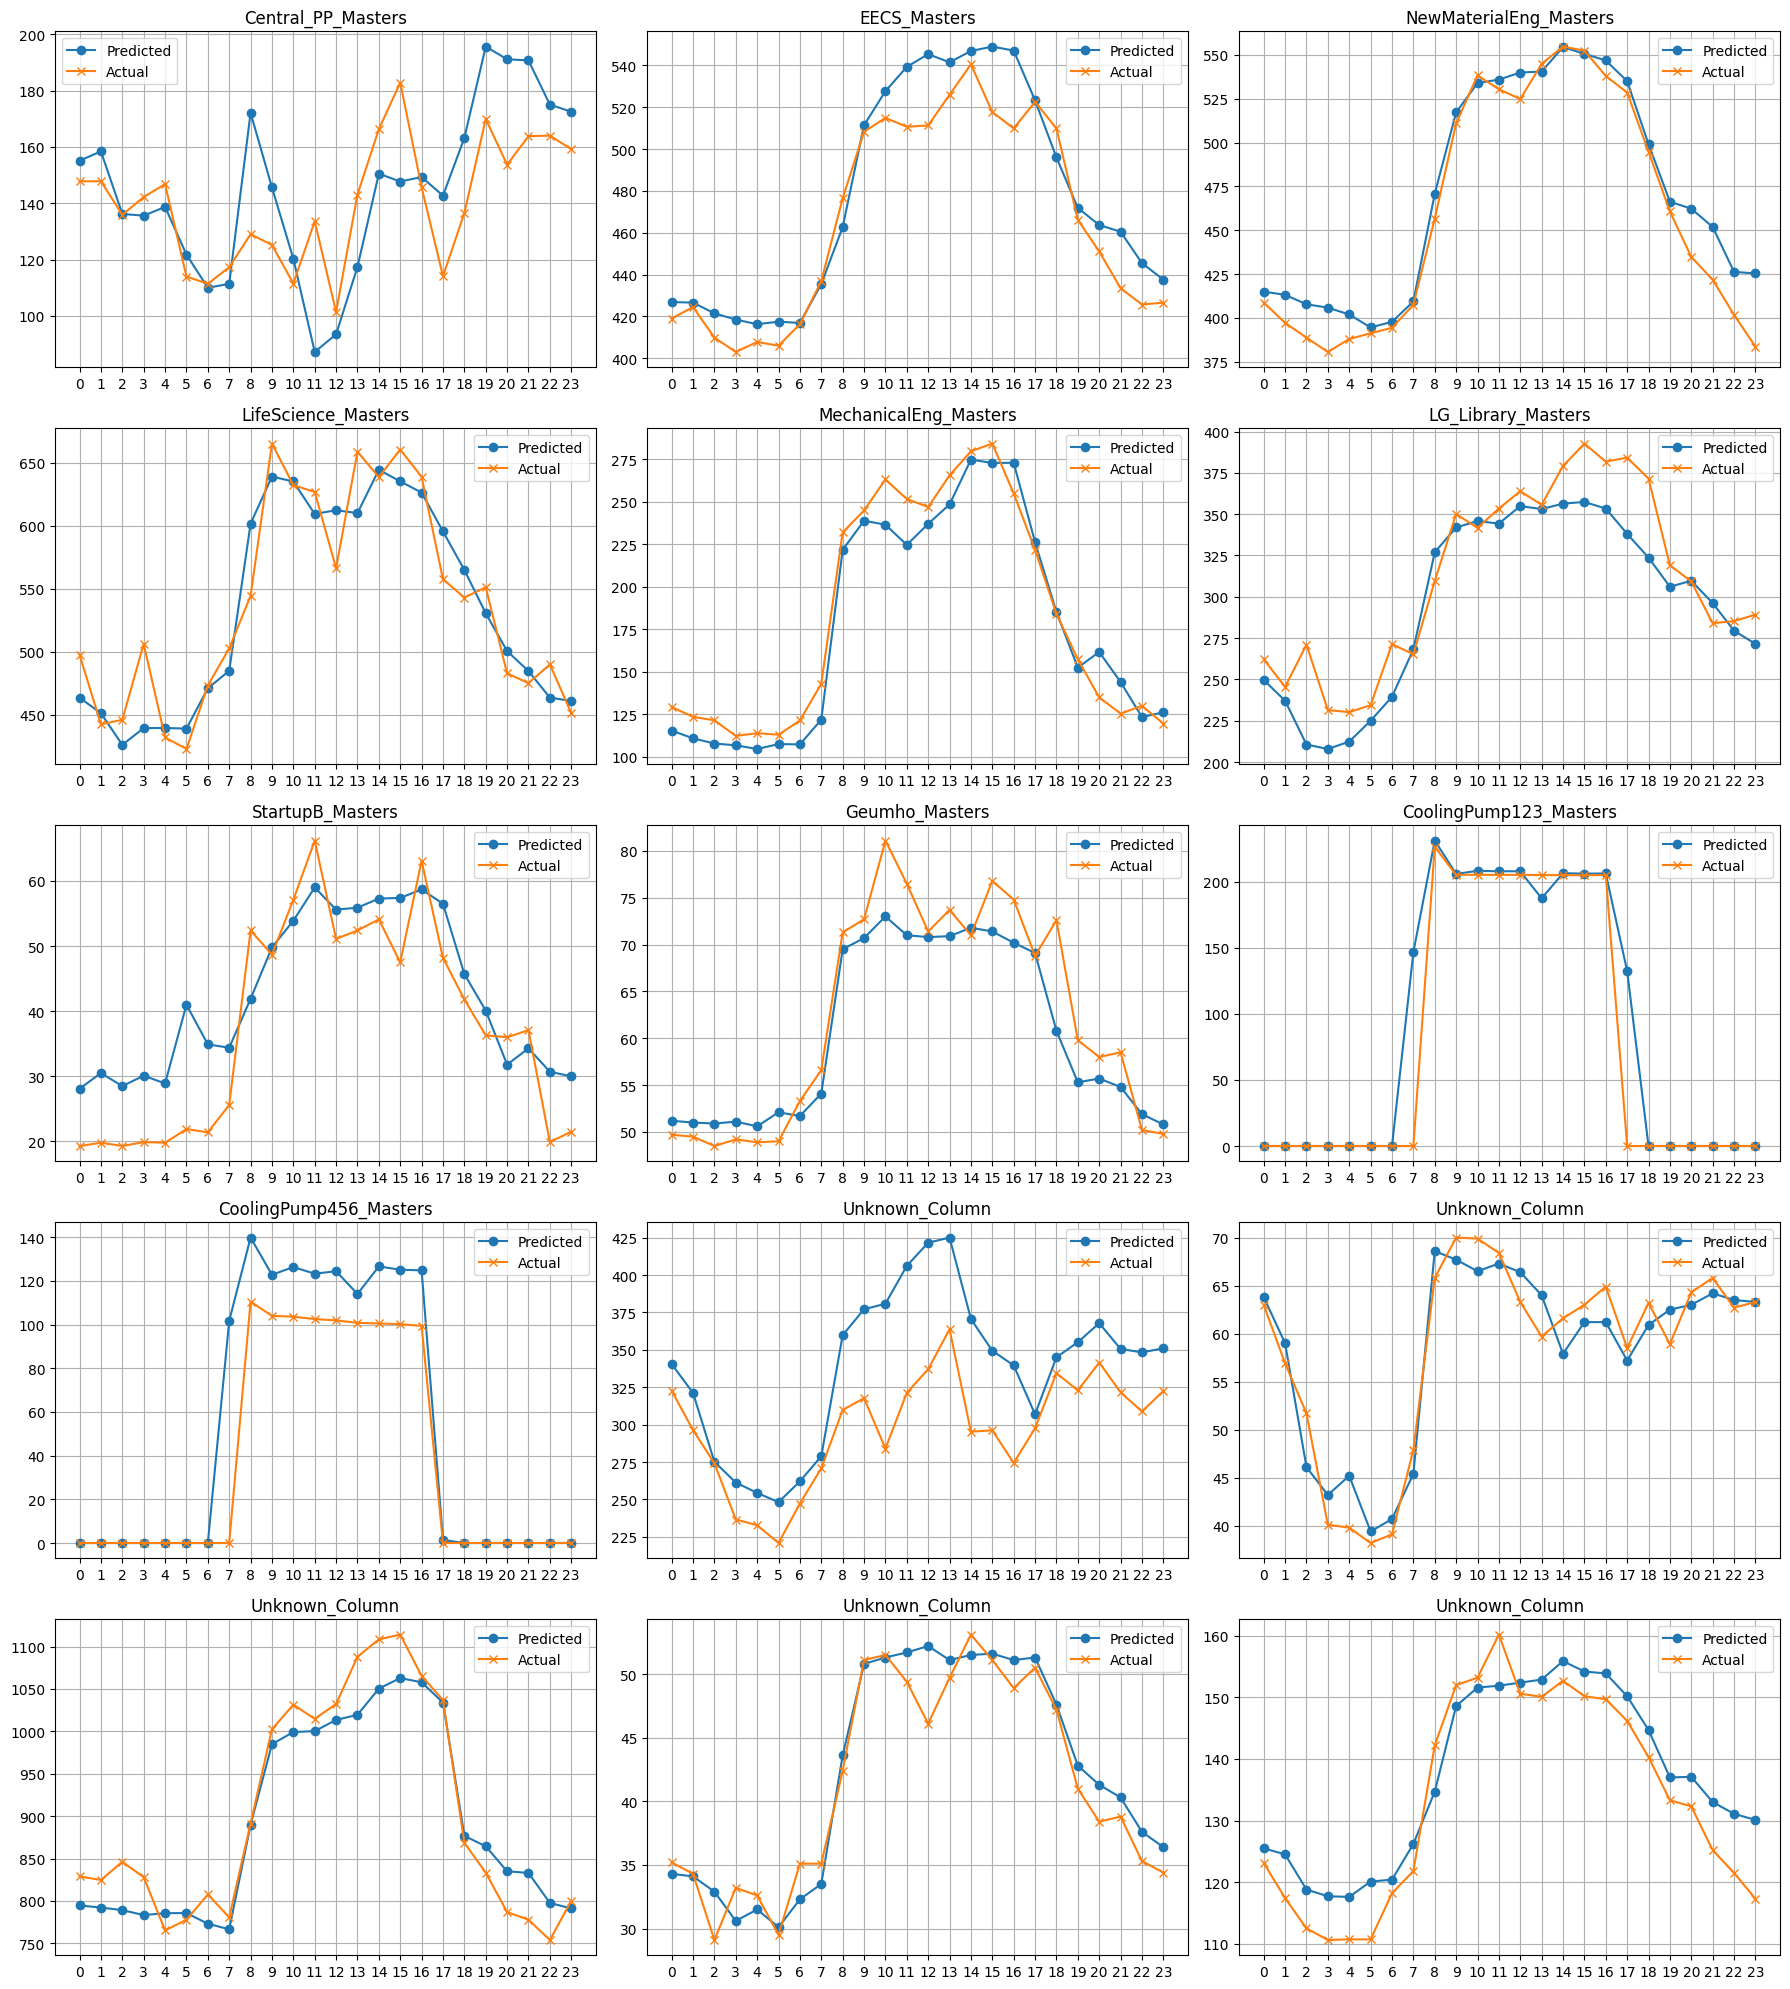

In [14]:
import matplotlib.pyplot as plt

hours = list(range(24))

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 20))
for ax, column in zip(axes.flatten(), res_load.columns):
    ax.plot(hours, res_load[column], label='Predicted', marker='o')
    ax.plot(hours, same_day_y_test[column], label='Actual', marker='x')  # Using the dummy data as 'Actual' for demonstration
    ax.set_title(korean_to_english_load(column))
    ax.legend()
    ax.grid(True)
    ax.set_xticks(hours)
    
plt.tight_layout()
plt.show()

In [15]:
mape_value = round(calculate_mape(res_load, same_day_y_test), 1)
print(f"오차율은 {mape_value}% 입니다")

오차율은 1.3% 입니다


# 전기 요금 예측 알고리즘

In [16]:
import pandas as pd
res_solar_sum = pd.DataFrame(res_solar.sum(axis=1), columns=['Total Predicted Solar'])
res_load_sum = pd.DataFrame(res_load.sum(axis=1), columns=['Total Predicted Load'])

In [17]:
# * 예측 발전량과 부하량을 통해 전기 요금 산출

from algorithm.schedule_algorithm import schedule

algorithm = schedule()

res_solar_sum_updated = res_solar_sum["Total Predicted Solar"].values.tolist()
res_load_sum_updated = res_load_sum["Total Predicted Load"].values.tolist()
result,data = algorithm.schedule_optimizer([res_solar_sum_updated],[res_load_sum_updated])
result

23896533.863143995

In [18]:
# * 원으로 변경 및 자리수 맞추기

integer_result = int(result)

integer_result_= int(integer_result / 10) * 10
final_result = "{:,}".format(integer_result)
print(final_result+"원")

23,896,533원


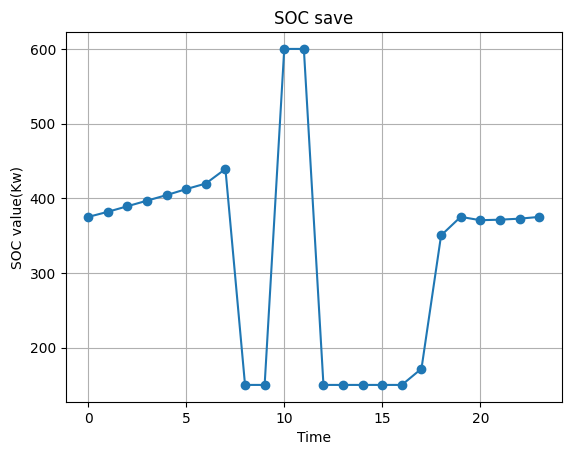

In [19]:
import matplotlib.pyplot as plt

# 데이터 생성
x = [k for k in range(24)]

# 그래프 그리기
plt.plot(x, data, marker='o')  # 선 그래프에 마커 추가
pd.set_option('display.max_columns', None)
plt.title("SOC save")
plt.xlabel("Time")
plt.ylabel("SOC value(Kw)")
plt.grid(True)
plt.show()